# Exercie 1: Échauffement avec le jeu de données Hearthstone

In [5]:
import pandas as pd  # charge le module pandas et le renomme pd
data = pd.read_csv(full_dataset.csv)

len(data)

data.columns[0]
data.columns[2]
data.columns[-1]

data.shape

data.iloc[0]
data.iloc[0:5]
data.iloc[-5:-1]
data.iloc[0:10:3]

data[my_health]

data[[my_health,my_hand]].iloc[0:5]

data[my_health] > 20
data[my_health] > data[opponent_health]

data[my_board_nb_creatures].value_counts()

data.loc[(data[my_health] > data[opponent_health]) & (data[my_board_nb_creatures] == 2)]

,game_id,me_playing,my_board_nb_creatures,my_board_total_attack,my_board_total_health,my_class,my_hand,my_health,opponent_board_nb_creatures,opponent_board_total_attack,opponent_board_total_health,opponent_class,opponent_hand,opponent_health,result,turn_id,turns_to_end
1,434,True,2,4.0,6.0,Mage,3,30,2,6.0,3.0,Warlock,3,27,0,2,9
33,481,True,2,3.0,5.0,Mage,3,30,0,0.0,0.0,Warrior,6,29,1,1,16
45,481,True,2,6.0,8.0,Mage,4,24,2,4.0,5.0,Warrior,5,9,1,13,4
47,481,True,2,9.0,7.0,Mage,3,21,2,5.0,4.0,Warrior,7,9,1,15,2
60,1356,True,2,6.0,5.0,Mage,2,28,1,1.0,1.0,Paladin,5,20,0,11,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36103,1786,True,2,6.0,3.0,Paladin,2,28,0,0.0,0.0,Hunter,4,26,1,3,9
36105,1786,True,2,6.0,3.0,Paladin,4,28,0,0.0,0.0,Hunter,4,22,1,5,7
36106,1786,False,2,4.0,3.0,Paladin,4,26,1,3.0,1.0,Hunter,4,22,1,6,6
36109,1786,True,2,8.0,8.0,Paladin,3,23,1,3.0,5.0,Hunter,4,15,1,9,3


# Analyse exploratoire des données

## Description des opérations effectuées

1. **Taille du dataset**
   - `len(data)` : Affiche le nombre total de lignes dans le dataset

2. **Accès aux colonnes**
   - `data.columns[0]` : Affiche le nom de la première colonne
   - `data.columns[2]` : Affiche le nom de la troisième colonne
   - `data.columns[-1]` : Affiche le nom de la dernière colonne

3. **Dimensions du dataset**
   - `data.shape` : Affiche le nombre de lignes et de colonnes (format: (lignes, colonnes))

4. **Sélection de lignes**
   - `data.iloc[0]` : Affiche la première ligne
   - `data.iloc[0:5]` : Affiche les 5 premières lignes
   - `data.iloc[-5:-1]` : Affiche les 4 dernières lignes
   - `data.iloc[0:10:3]` : Affiche une ligne sur trois parmi les 10 premières lignes

5. **Sélection de colonnes**
   - `data[my_health]` : Affiche uniquement la colonne my_health
   - `data[[my_health,my_hand]].iloc[0:5]` : Affiche les colonnes my_health et my_hand pour les 5 premières lignes

6. **Filtres et conditions**
   - `data[my_health] > 20` : Crée un masque booléen indiquant si la santé est supérieure à 20
   - `data[my_health] > data[opponent_health]` : Compare la santé du joueur avec celle de l'adversaire

7. **Analyse statistique**
   - `data[my_board_nb_creatures].value_counts()` : Compte le nombre d'occurrences de chaque valeur dans la colonne my_board_nb_creatures

8. **Filtrage complexe**
   - `data.loc[(data[my_health] > data[opponent_health]) & (data[my_board_nb_creatures] == 2)]` :
     - Sélectionne les lignes où le joueur a plus de points de vie que l'adversaire
     - ET où le joueur a exactement 2 créatures sur le plateau

In [7]:
turns_before_end = 4   # 4 tours avant la fin

turn_df = data.loc[data[turns_to_end]==turns_before_end]
print(len(turn_df))

2049


In [9]:
features_cols = [my_health, opponent_health, my_hand, opponent_hand, my_board_nb_creatures,
     my_board_total_health, my_board_total_attack, opponent_board_nb_creatures,
     opponent_board_total_health, opponent_board_total_attack, me_playing]
 
pred_col = result
 
X = turn_df[features_cols]
Y = turn_df[pred_col]

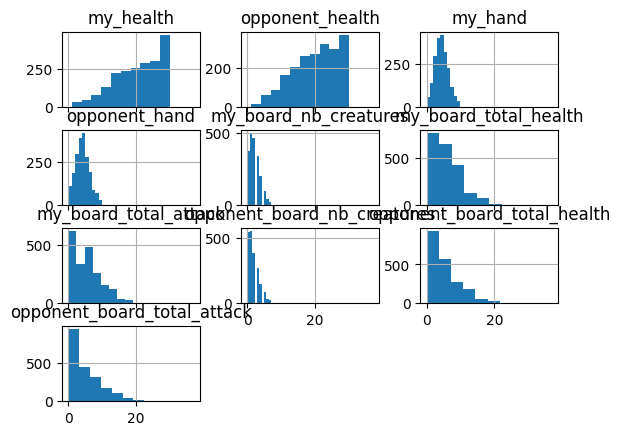

In [10]:
_ = X.hist(sharex=True)

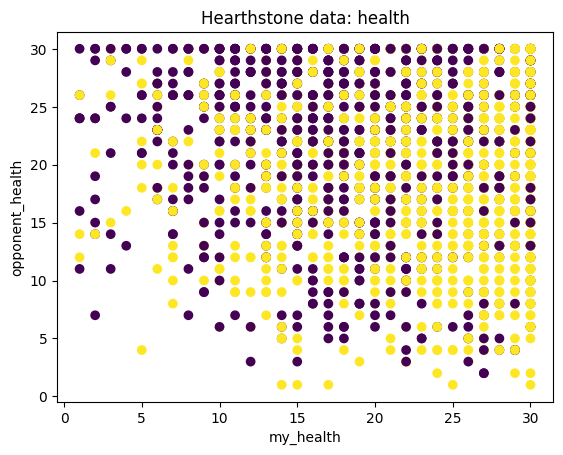

In [11]:
from matplotlib import pyplot as plt # alias the name pyplot by plt 
 
x_col=my_health
y_col=opponent_health
 
plt.xlabel(x_col) # all the functions defined in a given library should be prefixed by the name of the library
plt.ylabel(y_col)
plt.title(Hearthstone data: health)
 
plt.scatter(X[x_col], X[y_col],c=Y)  # c is the named argument for marker color
plt.show() 


## Visualisation des données avec Matplotlib

### Importation et configuration
```python
 from matplotlib import pyplot as plt
```
- Importe la bibliothèque de visualisation matplotlib
- `pyplot` est renommé en `plt` pour plus de concision
    
### Définition des variables
```python
x_col = \my_health\
y_col = \opponent_health\
```
- Définit les colonnes à utiliser pour l'axe X et Y
- `my_health` : points de vie du joueur
- `opponent_health` : points de vie de l'adversaire
    
### Configuration du graphique
```python
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title(\Hearthstone data: health\)
```
- `plt.xlabel()` : définit le label de l'axe X
- `plt.ylabel()` : définit le label de l'axe Y
- `plt.title()` : définit le titre du graphique
    
### Création du nuage de points
```python
plt.scatter(X[x_col], X[y_col], c=Y)
```
- `plt.scatter()` : crée un nuage de points
- `X[x_col]` : valeurs pour l'axe X (points de vie du joueur)
- `X[y_col]` : valeurs pour l'axe Y (points de vie de l'adversaire)
- `c=Y` : utilise la variable Y pour colorer les points (probablement pour distinguer les victoires des défaites)
    
### Affichage
```python
plt.show()
```
- Affiche le graphique dans le notebook
    
### Objectif de la visualisation
Ce graphique permet de visualiser la relation entre les points de vie du joueur et de l'adversaire, avec une distinction de couleur pour identifier les victoires et les défaites. Cela peut aider à identifier des patterns dans les parties de Hearthstone.


In [12]:
print(Y==0)
print(X.loc[Y==0])

6         True
13        True
28        True
45       False
65        True
         ...  
36086    False
36096    False
36108    False
36122    False
36143     True
Name: result, Length: 2049, dtype: bool
       my_health  opponent_health  my_hand  opponent_hand  \
6             23               27        3              2   
13            27               30        3              4   
28             8               28        5              4   
65            18               20        4              4   
79            26               26        3              3   
...          ...              ...      ...            ...   
35913         28               18        6              2   
35932         13               30        6              5   
35962         13               14        5              7   
36034          9               15        3              2   
36143         14               23        4              4   

       my_board_nb_creatures  my_board_total_health  my_board_

## Analyse des commandes de filtrage

### Code
```python
print(Y==0)
print(X.loc[Y==0])
```

### Explication

1. `print(Y==0)` :
   - Crée un masque booléen qui indique où Y est égal à 0
   - Retourne un tableau de True/False
   - True pour les lignes où Y=0 (défaites)
   - False pour les lignes où Y=1 (victoires)

2. `print(X.loc[Y==0])` :
   - Utilise le masque booléen précédent pour filtrer le DataFrame X
   - `X.loc[Y==0]` sélectionne uniquement les lignes où Y=0
   - Affiche toutes les colonnes de X pour les parties perdues

### Résultat
Le résultat montre :
- Un tableau de booléens indiquant quelles parties sont des défaites
- Un DataFrame contenant toutes les caractéristiques des parties perdues, incluant :
  - Les points de vie du joueur et de l'adversaire
  - Le nombre de créatures sur le plateau
  - Les points d'attaque et de vie totaux
  - Les classes des joueurs
  - Le nombre de cartes en main
  - Le numéro du tour
  - Le nombre de tours restants

### Utilité
Ces commandes sont utiles pour :
- Identifier les patterns des défaites
- Analyser les situations qui mènent à une défaite
- Comprendre les caractéristiques communes des parties perdues
- Préparer les données pour l'apprentissage automatique

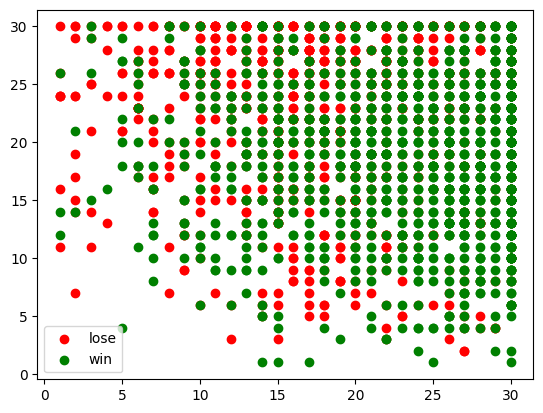

In [13]:
X_lose = X.loc[Y==0]
X_win = X.loc[Y==1]
plt.scatter(X_lose[x_col], X_lose[y_col], color="red",label="lose")
plt.scatter(X_win[x_col], X_win[y_col], color="green",label="win") 
plt.legend()
plt.show()

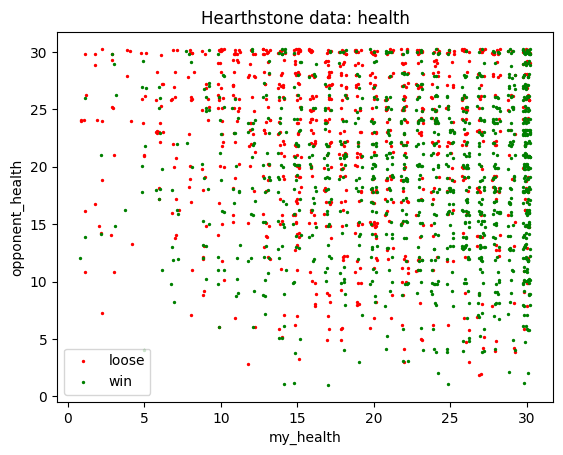

In [14]:
import pandas as pd
from matplotlib import pyplot as plt
from numpy.random import random
 
data = pd.read_csv("full_dataset.csv")
 
features_cols = ["my_health", "opponent_health", "my_hand", "opponent_hand", "my_board_nb_creatures",
     "my_board_total_health", "my_board_total_attack", "opponent_board_nb_creatures",
     "opponent_board_total_health", "opponent_board_total_attack", "me_playing"]
 
pred_col = "result"
 
turns_before_end = 4
 
turn_df = data[data["turns_to_end"] == turns_before_end]
X = turn_df[features_cols]
Y = turn_df[pred_col]
 
x_col="my_health"
y_col="opponent_health"
 
colors=["red", "green"]
labels=["loose", "win"]
for i in range(2):
    indices = Y==i
    nb_rows = sum(indices)
    plt.scatter(X.loc[indices][x_col] + 0.5*(random(nb_rows)-0.5),
                X.loc[indices][y_col] + 0.5*(random(nb_rows)-0.5),
                color=colors[i],label=labels[i],s=2)
plt.legend()
plt.xlabel(x_col) 
plt.ylabel(y_col)
plt.title("Hearthstone data: health") 
plt.show()

## Analyse de la visualisation améliorée

### Le nombre aléatoire (random)

Le nombre aléatoire ajouté avec `random(nb_rows)-0.5` sert à :
- Éviter le chevauchement des points qui ont exactement les mêmes coordonnées
- Créer un effet de "jitter" (dispersion) qui permet de mieux visualiser la densité des points
- Rendre la visualisation plus lisible en évitant que les points se superposent parfaitement
- La valeur 0.5 est un facteur d'échelle qui contrôle l'amplitude de la dispersion

### Comparaison avec la visualisation précédente

Cette visualisation est plus informative que la précédente car :
1. **Meilleure lisibilité** :
   - Le jitter permet de mieux voir la distribution des points

2. **Plus de détails** :
   - On peut mieux distinguer les zones de densité
   - Les chevauchements sont réduits
   - La relation entre les points de vie et l'issue de la partie est plus claire

3. **Meilleure interprétation** :
   - On peut facilement identifier les patterns de victoire/défaite
   - Les zones de transition entre victoire et défaite sont plus visibles
   - La distribution des points est plus représentative de la réalité des données

# Exercice 2 : Classification KNN sur Hearthstone

In [15]:
from sklearn import neighbors
k = 45
 
# pour de l’aide taper: help(neighbors.KNeighborsClassifier)
clf = neighbors.KNeighborsClassifier(k)
 
# pour de l’aide taper: help(clf.fit)
clf.fit(X, Y) #on suppose de X et Y sont définis comme dans la partie précédente
 
# pour de l’aide taper: help(clf.predict) 
print(clf.predict(X[0:5])) 
 
print(clf.predict_proba(X[0:5])) 
print(clf.score(X,Y)) 

[0 0 0 1 0]
[[0.93333333 0.06666667]
 [0.68888889 0.31111111]
 [0.95555556 0.04444444]
 [0.15555556 0.84444444]
 [0.82222222 0.17777778]]
0.7847730600292826


## Analyse du code d'apprentissage automatique

### Importation et configuration
```python
from sklearn import neighbors
k = 45
```
- Importe le module `neighbors` de scikit-learn pour l'algorithme des k-plus proches voisins
- Définit k=45, c'est-à-dire que l'algorithme utilisera les 45 plus proches voisins pour faire ses prédictions

### Création et entraînement du modèle
```python
clf = neighbors.KNeighborsClassifier(k)
clf.fit(X, Y)
```
- Crée un classificateur KNN avec k=45
- `fit()` entraîne le modèle sur les données :
  - X : caractéristiques (points de vie, créatures, etc.)
  - Y : résultats (victoire/défaite)

### Prédictions et évaluation
```python
print(clf.predict(X[0:5]))
print(clf.predict_proba(X[0:5]))
print(clf.score(X,Y))
```
1. `predict()` : 
   - Prédit la classe (victoire/défaite) pour les 5 premières parties
   - Retourne 0 (défaite) ou 1 (victoire)

2. `predict_proba()` :
   - Calcule la probabilité de chaque classe
   - Retourne un tableau avec les probabilités de défaite et de victoire
   - Exemple : [0.7, 0.3] signifie 70% de chance de défaite, 30% de chance de victoire

3. `score()` :
   - Évalue la performance du modèle sur l'ensemble des données
   - Retourne le pourcentage de prédictions correctes
   - Plus le score est proche de 1, meilleur est le modèle

In [16]:
k = 1
clf = neighbors.KNeighborsClassifier(k)
clf.fit(X, Y)
print(clf.predict(X[0:5])) 
print(clf.predict_proba(X[0:5])) 
print(clf.score(X,Y)) 

[0 0 0 1 0]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]
1.0


In [17]:
k = 1000
clf = neighbors.KNeighborsClassifier(k)
clf.fit(X, Y)
print(clf.predict(X[0:5])) 
print(clf.predict_proba(X[0:5])) 
print(clf.score(X,Y)) 

[0 1 0 1 0]
[[0.633 0.367]
 [0.461 0.539]
 [0.674 0.326]
 [0.29  0.71 ]
 [0.635 0.365]]
0.7510980966325037


## Évaluation des modèles de classification

### Problème de l'évaluation sur les données d'apprentissage

Lorsqu'on évalue un modèle sur les mêmes données utilisées pour l'entraînement, on obtient une **surestimation** de sa performance réelle. C'est ce qu'on appelle le **surapprentissage** (overfitting). Le modèle "mémorise" les données d'entraînement au lieu d'apprendre des patterns généraux.

### Solution : Séparation des données

Pour une évaluation plus réaliste, on divise les données en deux ensembles :
1. **Jeu d'apprentissage** (training set) :
   - Utilisé pour entraîner le modèle
   - Généralement 70-80% des données

2. **Jeu de test** (test set) :
   - Utilisé pour évaluer le modèle
   - Généralement 20-30% des données
   - Simule des données "inconnues"

### Problème avec peu de données

Quand on a peu de données :
- La séparation réduit encore plus la taille des ensembles
- Le jeu d'apprentissage devient trop petit pour un apprentissage efficace
- Le jeu de test devient trop petit pour une évaluation fiable
- L'évaluation peut être pessimiste car le modèle n'a pas assez de données pour apprendre